In [182]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

In [183]:
import easyocr
reader=easyocr.Reader(['en'])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [184]:
a=cv2.imread('image.jpg')
b=cv2.imread(r"C:\Users\golup\Desktop\plate_model\test foldder\loop trial\lp_img7.jpg")
c=cv2.imread(r"C:\Users\golup\Desktop\plate_model\test foldder\3061.png")
d=cv2.imread(r"C:\Users\golup\Desktop\plate_model\test foldder\video4_3830.jpg")
e=cv2.imread(r"C:\Users\golup\Desktop\plate_model\test foldder\2.png")
f=cv2.imread(r"C:\Users\golup\Desktop\plate_model\test foldder\loop trial\extraction\plates\4be1ff39-b2ad-45e0-9c9a-0e7215cbb5b6___2.jpg.jpeg")
g=cv2.imread(r'tr1.png')

(-0.5, 299.5, 224.5, -0.5)

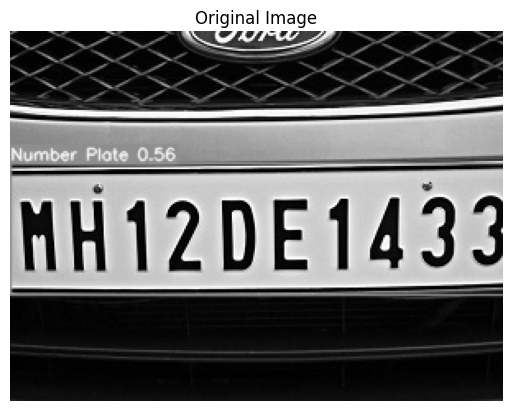

In [185]:
IMG_COPY=f.copy()
src_copy=f.copy()
gray=cv2.cvtColor(IMG_COPY,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray');plt.title("Original Image");plt.axis('off')

(-0.5, 299.5, 224.5, -0.5)

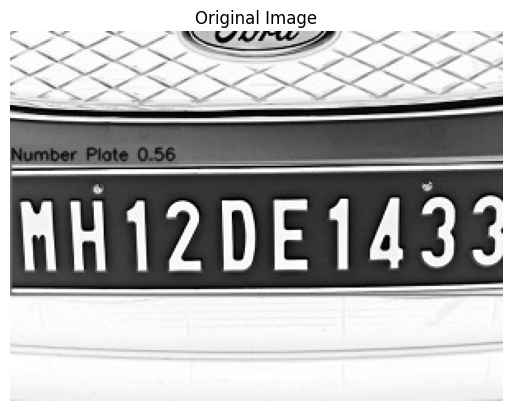

In [186]:
gray_inverted=cv2.bitwise_not(gray)
plt.imshow(gray_inverted,cmap='gray');plt.title("Original Image");plt.axis('off')

(-0.5, 299.5, 224.5, -0.5)

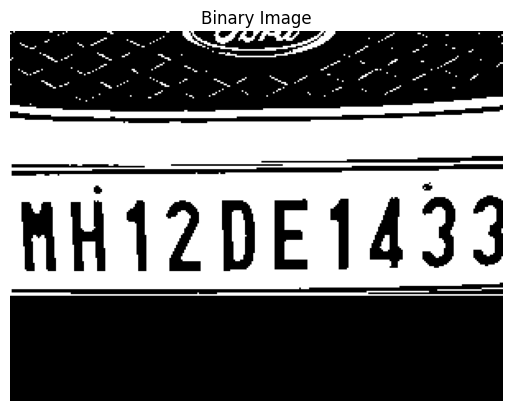

In [187]:
_,binary=cv2.threshold(gray,100,255,cv2.THRESH_OTSU)
plt.imshow(binary,cmap='gray');plt.title("Binary Image");plt.axis('off')

(-0.5, 299.5, 224.5, -0.5)

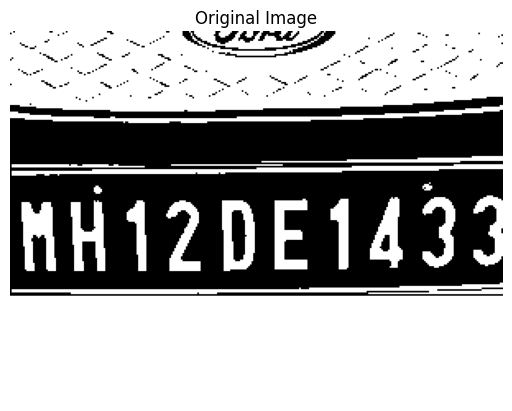

In [188]:
gray_inverted=cv2.bitwise_not(binary)
plt.imshow(gray_inverted,cmap='gray');plt.title("Original Image");plt.axis('off')

(-0.5, 299.5, 224.5, -0.5)

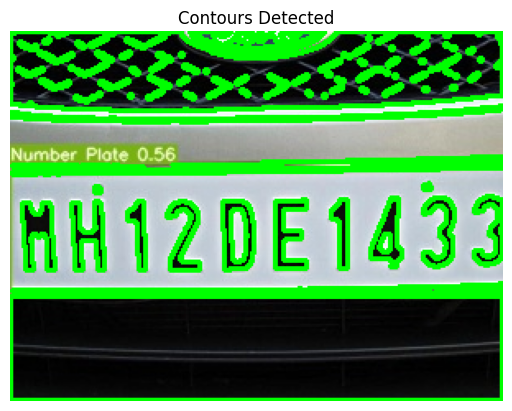

In [189]:
contours,hierarchy=cv2.findContours(gray_inverted,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(IMG_COPY,contours,-1,(0,255,0),2)
plt.imshow(IMG_COPY[:,:,::-1]);plt.title("Contours Detected");plt.axis('off')

In [190]:
# biggest_contour=max(contours,key=cv2.contourArea)
# cv2.drawContours(src_copy,biggest_contour,-1,(0,255,0),4)
# # plt.figure(figsize=[1][1])
# plt.imshow(src_copy[:,:,::-1]);plt.axis('off')

In [191]:

# for i,cont in enumerate(contours):
#     if hierarchy[0][i][3]!=-1:
#         src_copy=cv2.drawContours(src_copy,cont,-1,(255,0,0),3)
#     elif hierarchy[0][i][3]!=-2:
#         src_copy=cv2.drawContours(src_copy,cont,-1,(255,0,0),3)
# print("Number of contours returned:{}".format(len(contours)))
# # plt.figure(figsize=[10][10])
# plt.imshow(src_copy);plt.axis('off');plt.title('RETR_CCOMP')

In [192]:
# for i, contour in enumerate(contours):
#     x, y, w, h = cv2.boundingRect(contour)
#     cv2.rectangle(src_copy, (x, y), (x+w, y+h), (0, 255, 0), 3)

# plt.figure(figsize=[10,10])
# plt.imshow(src_copy[:,:,::-1])
# plt.axis('off')


In [193]:
# x,y,w,h=cv2.boundingRect(contours[1])
# cv2.rectangle(src_copy,(x,y),(x+w,y+h),(0,255,0),3)
# plt.figure(figsize=[10,10])
# plt.imshow(src_copy[:,:,::-1]);plt.axis('off')

In [194]:
biggest_contour=max(contours,key=cv2.contourArea)
smallest_contour=min(contours,key=cv2.contourArea)
smallest_area = cv2.contourArea(smallest_contour)
biggest_area = cv2.contourArea(biggest_contour)
img_res = []
img_res1=[]
img_res2=[]
x_cntr_list = []
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > 30  and area < biggest_area:
        x, y, w, h = cv2.boundingRect(contour)
        x_cntr_list.append(x)
        try:
            crop_image=src_copy[y-1:y+h+1,x-1:x+w+1]
            crop_image_resized = cv2.resize(crop_image, (32, 32))
            crop_image1=gray[y-1:y+h+1,x-1:x+w+1]
            crop_image_resized1 = cv2.resize(crop_image1, (32, 32))
            crop_image2=gray_inverted[y-1:y+h+1,x-1:x+w+1]
            crop_image_resized2 = cv2.resize(crop_image2, (32, 32))
        except:
            crop_image=src_copy[y:y+h,x:x+w]
            crop_image_resized = cv2.resize(crop_image, (32, 32))
            crop_image1=gray[y:y+h,x:x+w]
            crop_image_resized1 = cv2.resize(crop_image1, (32, 32))
            crop_image2=gray_inverted[y:y+h,x:x+w]
            crop_image_resized2 = cv2.resize(crop_image2, (32, 32))
        # cv2.imshow('Cropped Image',crop_image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # cv2.imshow('Cropped Image',crop_image1)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # cv2.imshow('Cropped Image',crop_image2)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        img_res.append(crop_image_resized)
        img_res1.append(crop_image_resized1)
        img_res2.append(crop_image_resized2)
        
indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
img_res_copy = []
img_res_copy1 = []
img_res_copy2 = []
for idx in indices:
    img_res_copy.append(img_res[idx])
    img_res_copy1.append(img_res1[idx])
    img_res_copy2.append(img_res2[idx])
img_res = np.array(img_res_copy)
img_res1 = np.array(img_res_copy1)
img_res2 = np.array(img_res_copy2)

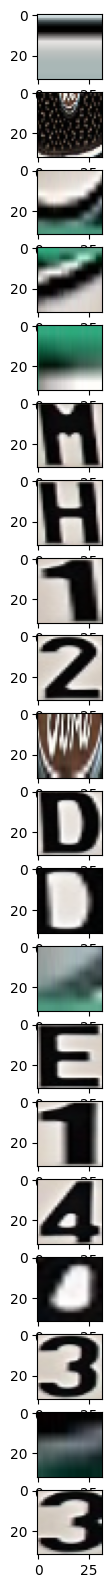

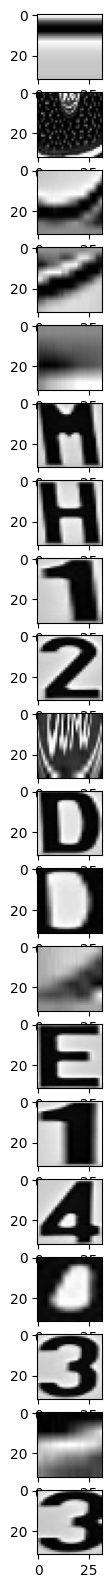

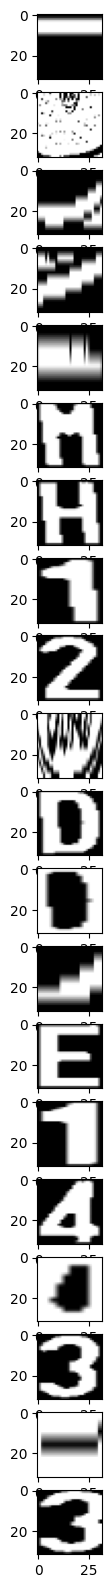

In [195]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(img_res), figsize=(3, 1 * len(img_res)))
for i, img in enumerate(img_res):
    axs[i].imshow(img, cmap='gray')
plt.show()
fig, axs = plt.subplots(nrows=len(img_res1), figsize=(3, 1 * len(img_res1)))
for i, img in enumerate(img_res1):
    axs[i].imshow(img, cmap='gray')
plt.show()
fig, axs = plt.subplots(nrows=len(img_res2), figsize=(3, 1 * len(img_res2)))
for i, img in enumerate(img_res2):
    axs[i].imshow(img, cmap='gray')
plt.show()



In [196]:
bounds=[]
bounds1=[]
bounds2=[]
for img in img_res:
    bounds.append(reader.readtext(img))
    # bounds.append(pytesseract.image_to_string(img,config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))
print(bounds)
for img in img_res1:
    bounds1.append(reader.readtext(img))
    # bounds.append(pytesseract.image_to_string(img,config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))
print(bounds1)
for img in img_res2:
    bounds2.append(reader.readtext(img))
    # bounds.append(pytesseract.image_to_string(img,config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))
print(bounds2)

[[], [], [], [], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'N', 0.1538367313447111)], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'H', 0.9928881465889141)], [([[2, 0], [32, 0], [32, 32], [2, 32]], '7', 0.9823111188577318)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '2', 0.9998118965876444)], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'D', 0.9997332274042634)], [], [], [([[2, 0], [32, 0], [32, 32], [2, 32]], 'E', 0.2619197686740904)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '7', 0.3078968671087665)], [([[4, 0], [32, 0], [32, 32], [4, 32]], '4', 0.9984582649070859)], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], '3', 0.6073995326127365)], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], '3', 0.9999873638552259)]]
[[], [], [], [], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'N', 0.1616598661259241)], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'H', 0.9932176825011574)], [([[2, 0], [32, 0], [32, 32], [2, 32]], '7', 0.9777216538069609)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '2', 0.9997824548793268)], 

In [197]:
characters = []
characters1 =[]
characters2=[]
for result in bounds:
    if result:
        characters.append(result[0][1])
print(characters)
for result in bounds1:
    if result:
        characters1.append(result[0][1])
print(characters1)
for result in bounds2:
    if result:
        characters2.append(result[0][1])
print(characters2)


['N', 'H', '7', '2', 'D', 'E', '7', '4', '3', '3']
['N', 'H', '7', '2', 'D', 'E', '7', '4', '3', '3']
['N', 'H', '7', '2', 'D', 'F', '7', '4', '3', '3']


In [199]:
img_res2.shape

(20, 32, 32)